# Ratings and Scores of Beers

### Import the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import pyodbc

### Query data from SQL Server
A beer can be associate with multiple locations.  For example, a beer can be sold at a brewery and a taproom.  Thus, the beer records are grouped by their URL which is a unique identifier for each beer.

In [2]:
sql_conn = pyodbc.connect('DRIVER={ODBC Driver 13 for SQL Server};SERVER=localhost;DATABASE=BA;Trusted_Connection=yes') 
query = '''
SELECT MAX(BR.name) AS 'brewery_name', MAX(B.name) AS 'beer_name', MAX(style) AS style, MAX(abv) AS abv, MAX(B.ratings) AS ratings, MAX(B.score) AS score
FROM beers B
LEFT JOIN breweries BR ON B.brewery_id = BR.brewery_id
GROUP BY [url]'''
df = pd.read_sql(query, sql_conn)

df.head(5)

,brewery_name,beer_name,style,abv,ratings,score
0,Privatbrauerei Schweiger,Natur Russ,Fruit and Field Beer,2.60,0,0.00
1,Dickensian Brewery,David Hopperfield,English Pale Ale,4.00,1,3.47
2,Pinellas Ale Works,Harold's St Pete Style Lager,American Light Lager,5.50,4,3.44
3,Odell Brewing Company,Sweet Destroyer Toffee Stout,American Stout,8.00,1,4.25
4,Payette Brewing,Harvest: Raspberry Brown Ale,American Brown Ale,5.50,1,2.58


### Distribution of scores (ie. ratings) of individual beers.

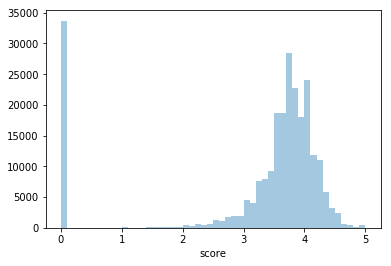

In [3]:
sns.distplot(df['score'], kde=False)

There's a large number of beers with a score of 0.

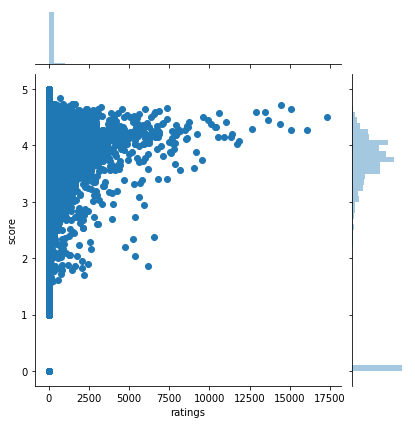

In [4]:
sns.jointplot('ratings','score',data=df)

The large number of beers with a score of 0 is explained by the lack of ratings (also 0).  The beers without ratings will be dropped.

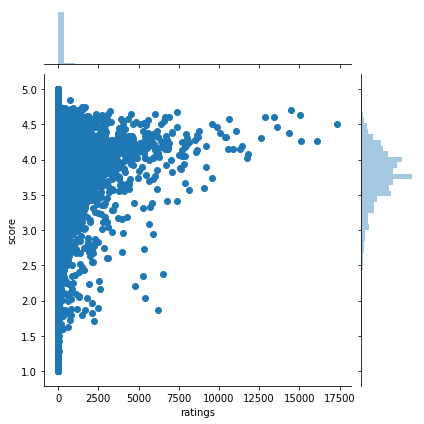

In [5]:
df.drop(df[df['ratings'] == 0].index, inplace=True)

sns.jointplot('ratings','score',data=df)

The data is still skewed heavily to low ratings quanity.  Even for beers with less than 100 ratings, the data is heavily skewed, the beers with less than 100 ratings will be dropped.

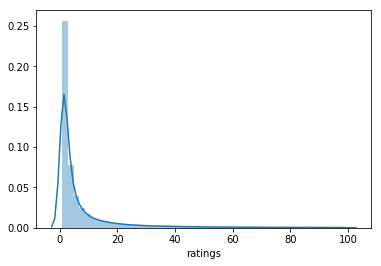

In [6]:
sns.distplot(df[df['ratings'] < 100]['ratings'])

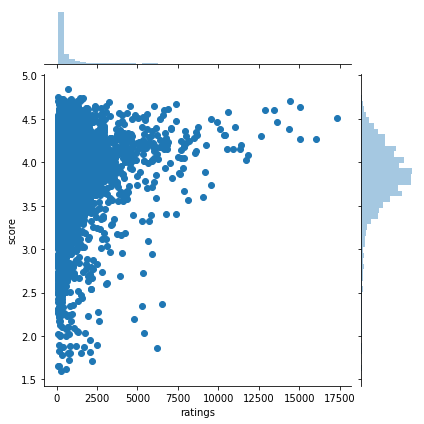

In [7]:
df.drop(df[df['ratings'] < 100].index, inplace=True)

sns.jointplot('ratings','score',data=df)

The data appears to have a slight trend, when ratings count increases score will also increase.  Here are the beers with more than 10,000 reviews, note the consistent score above 4.

In [8]:
df[df['ratings'] > 10000].sort_values('ratings', ascending=False)

,brewery_name,beer_name,style,abv,ratings,score
229733,Founders Brewing Company,Breakfast Stout,American Imperial Stout,8.30,17331,4.51
195385,Dogfish Head Craft Brewery,90 Minute IPA,American Imperial IPA,9.00,16072,4.27
220239,Bell's Brewery - Eccentric Café & General Store,Two Hearted Ale,American IPA,7.00,15074,4.27
15878,Russian River Brewing Company,Pliny The Elder,American Imperial IPA,8.00,15056,4.64
157543,The Alchemist,Heady Topper,New England IPA,8.00,14456,4.71
89086,Ballast Point Brewing Company,Sculpin,American IPA,7.00,14366,4.38
6030,Bell's Brewery - Eccentric Café & General Store,Hopslam Ale,American Imperial IPA,10.00,13629,4.46
67471,Founders Brewing Company,KBS (Kentucky Breakfast Stout),American Imperial Stout,12.30,13452,4.60
109732,Goose Island Beer Co.,Bourbon County Brand Stout,American Imperial Stout,15.20,12886,4.60
2613,North Coast Brewing Co.,Old Rasputin,Russian Imperial Stout,9.00,12634,4.30


Visualize a linear regression and we see that there is indeed a slight upward trend, implying that the most reviewed beers typically have higher scores.

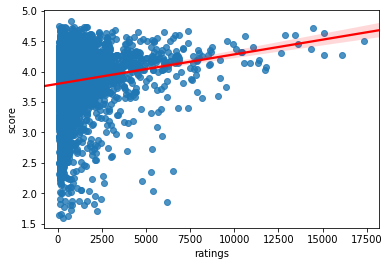

In [9]:
sns.regplot('ratings','score',data=df,line_kws={'color': 'red'})

Also interesting is the small cluster of beers with around 5000 ratings and scores under 3.0.

In [19]:
df_highratings = df[df['ratings'] > 5000]
df_lowscores = df_highratings[df_highratings['score'] < 3]

df_lowscores

,brewery_name,beer_name,style,abv,ratings,score
9633,Grupo Modelo S.A. de C.V.,Corona Extra,American Adjunct Lager,4.60,5259,2.35
77502,Heineken Nederland B.V.,Heineken Lager Beer,European Pale Lager,5.00,5362,2.73
78506,Pabst Brewing Company,Pabst Blue Ribbon (PBR),American Adjunct Lager,4.74,5928,2.94
158032,Anheuser-Busch,Bud Light,American Light Lager,4.20,6214,1.86
176599,Anheuser-Busch,Budweiser,American Adjunct Lager,5.00,6548,2.37
192720,Coors Brewing Company (Molson-Coors),Coors Light,American Light Lager,4.20,5385,2.04


These low score beers cooberate our domain knowledge: these are mass-produce low-cost beers from macro-breweries.